# Quantitative image analysis using scikit-image
After segmenting and labeling objects in an image, we can measure properties of these objects.

See also
* [SciPy lecture notes: Measuring region properties](https://scipy-lectures.org/packages/scikit-image/index.html#measuring-regions-properties)
* [Plot regionprops](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

Before we can do measurements, we need an `image` and a corresponding `label_image`. Therefore, we recapitulate filtering, thresholding and labeling:

In [1]:
from skimage.io import imread
from skimage import filters

from skimage import measure
from pyclesperanto_prototype import imshow

As an example image we will use an extracgt from the [BBBC007 dataset](https://bbbc.broadinstitute.org/BBBC007) image set version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012].

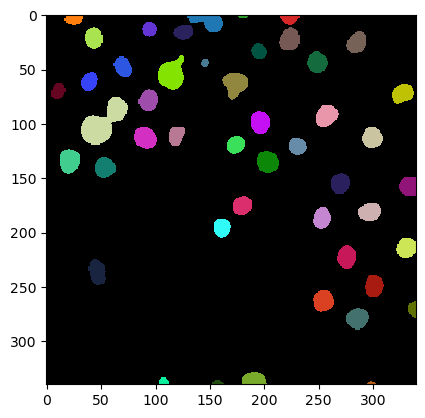

In [2]:
# load image
image = imread("../../data/BBBC007_batch/20P1_POS0010_D_1UL.tif")

# denoising
blurred_image = filters.gaussian(image, sigma=3)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
label_image = measure.label(thresholded_image)

# visualization
imshow(label_image, labels=True)

# Measurements / region properties
To read out properties from regions, we use the [regionprops_table](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table) function. To see which features can be measured, please refer to the documentation of [regionprops](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops).

In [3]:
# analyse objects
properties = measure.regionprops_table(label_image, intensity_image=image, 
                                      properties=('area', 'intensity_mean', 'major_axis_length', 'minor_axis_length'))

In [4]:
properties

{'area': array([139, 360,  43, 140, 144, 194, 251, 310, 276, 160, 283, 539, 237,
         51, 211, 402, 156, 278, 273, 972, 320, 305, 326, 207, 294, 224,
        213, 327, 319, 291, 263, 238, 250, 277, 264, 226, 267, 300, 290,
        282, 307,  84, 315, 206,  45,  33,  16]),
 'intensity_mean': array([ 96.54676259,  86.61388889,  91.48837209,  73.74285714,
         89.375     ,  85.72680412, 100.03984064, 106.14516129,
        113.82246377,  98.30625   , 110.24381625,  93.82931354,
         96.18987342,  64.23529412,  94.84834123, 101.45273632,
         81.39102564, 115.72661871, 108.32967033,  98.72016461,
        120.04375   , 104.26885246, 114.30674847,  81.94202899,
        114.47619048,  88.33482143,  95.05633803,  93.26911315,
        105.5830721 , 110.10309278, 102.33079848, 105.47478992,
        100.256     , 118.20938628,  88.06060606,  93.76548673,
        107.54681648, 104.21333333,  92.9137931 , 104.87943262,
        101.10423453,  86.86904762,  91.13333333,  94.26213592,
 

You can also add custom measurements by computing your own metric, for example the `aspect_ratio`:

In [5]:
properties['aspect_ratio'] = properties["major_axis_length"] / properties["minor_axis_length"]

properties['aspect_ratio']

array([1.70062136, 2.38580466, 2.98004496, 1.83631624, 1.01343203,
       1.29461619, 1.20212627, 1.18151422, 1.31156377, 1.11088572,
       1.0857654 , 1.288482  , 1.37612517, 1.11798081, 1.30580046,
       1.08428067, 1.30087572, 1.28709865, 1.13832246, 2.2472841 ,
       1.25706252, 1.14510091, 1.17364142, 1.35385767, 1.03488977,
       1.157405  , 1.09538071, 1.21331242, 1.08986474, 1.03306382,
       1.12220937, 1.08322409, 1.12889645, 1.33801776, 1.29800539,
       1.13084252, 1.0662664 , 1.20523462, 1.64986482, 1.18894552,
       1.03581123, 1.94490969, 1.08942617, 2.0036456 , 1.49867827,
       2.56895462, 2.78243337])

Reading those dictionaries of arrays is not very convenient. Thus, we use the [pandas library]() which is a common asset for data scientists.

In [6]:
import pandas as pd

dataframe = pd.DataFrame(properties)
dataframe

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio
0,139,96.546763,17.504104,10.292770,1.700621
1,360,86.613889,35.746808,14.983124,2.385805
2,43,91.488372,12.967884,4.351573,2.980045
3,140,73.742857,18.940508,10.314404,1.836316
4,144,89.375000,13.639308,13.458532,1.013432
5,194,85.726804,17.904347,13.829849,1.294616
6,251,100.039841,19.599604,16.304114,1.202126
7,310,106.145161,21.683488,18.352287,1.181514
8,276,113.822464,21.495874,16.389500,1.311564
9,160,98.306250,15.042573,13.541063,1.110886


Those dataframes can be saved to disk conveniently:

In [7]:
dataframe.to_csv("../../data/BBBC007_analysis.csv")

Furthermore, one can measure properties from our `statistics` table using [numpy](https://numpy.org/doc/stable/). For example the mean area:

In [8]:
import numpy as np

# measure mean area
np.mean(properties['area'])

253.36170212765958

# Exercises
Analyse the loaded blobs `image`. 

* How many objects are in it?

* How large is the largest object?

* What are mean and standard deviation of the image?

* What are mean and standard deviation of the area of the segmented objects?